<a href="https://colab.research.google.com/github/riyasatpathi/ML-PROJECTS/blob/main/dogs_vs_cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:05<00:00, 223MB/s]
100% 1.06G/1.06G [00:05<00:00, 203MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators- useful to process large amount of data and divide them into batches
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [ ]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize so that all piixel value is between 0 to 1
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds= validation_ds.map(process)

In [ ]:
#create CNN Model


model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',kernel_initializer='he_uniform', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', kernel_initializer='he_uniform',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid', kernel_initializer='he_uniform',activation='relu',))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 76s 105ms/step - loss: 1.4104 - accuracy: 0.5810 - val_loss: 0.6314 - val_accuracy: 0.6204
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6518 - accuracy: 0.6236 - val_loss: 0.6243 - val_accuracy: 0.6928
Epoch 3/10
625/625 [==============================] - 67s 106ms/step - loss: 0.5899 - accuracy: 0.6830 - val_loss: 0.5548 - val_accuracy: 0.7164
Epoch 4/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5156 - accuracy: 0.7426 - val_loss: 0.5173 - val_accuracy: 0.7498
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.4553 - accuracy: 0.7737 - val_loss: 0.4465 - val_accuracy: 0.8034
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4007 - accuracy: 0.8027 - val_loss: 0.4182 - val_accuracy: 0.8058
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3429 - accuracy: 0.8317 - val_loss: 0.4913 - val_ac

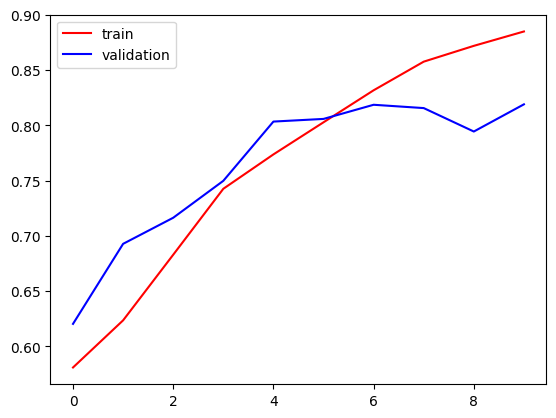

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


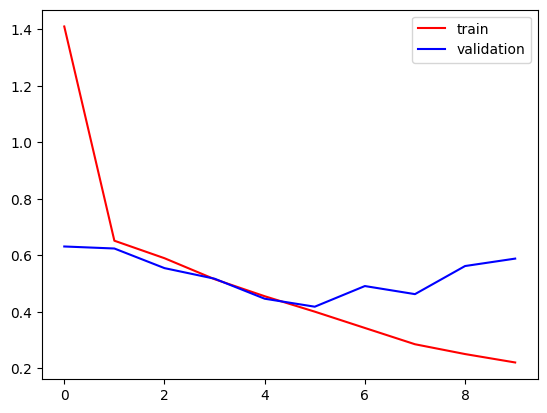

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
#The above indicate that our model is overfitting
#To reduce overfitting
#Add more data
#Data Augmentation
#L1/L2 Regularizer
#Dropout
#Batch Norm
#Reduce Complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat 5.jpg')

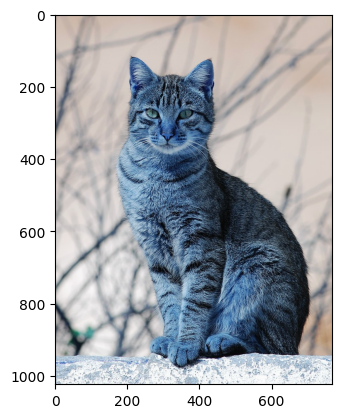

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1024, 767, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 401ms/step


array([[0.]], dtype=float32)

In [ ]:
test_img = cv2.imread('/content/dog1.jpg')

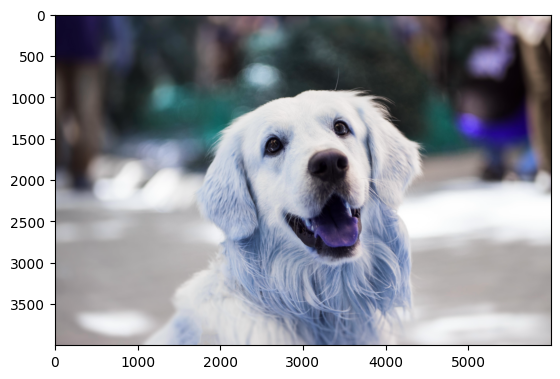

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(4000, 6000, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)